# Pre Processing Notebook

## Load the Data

In [120]:
! mkdir data

mkdir: data: File exists


In [142]:
# Spanish Parliament Corpus - in Spanish
"""! curl --remote-name-all https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1860{/ParlaMint-ES.ana.tgz}"""

# Belgium Parliament Corpus - in English
"""! curl --remote-name-all https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1910{/ParlaMint-BE-en.ana.tgz}"""

# Spanish Parliament Corpus - in English
"""! curl --remote-name-all https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1910{/ParlaMint-ES-en.ana.tgz}"""

# French Parliament Corpus - in English
! curl --remote-name-all https://www.clarin.si/repository/xmlui/bitstream/handle/11356/1910{/ParlaMint-FR-en.ana.tgz}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1925M  100 1925M    0     0  1039k      0  0:31:37  0:31:37 --:--:--  828k0  0:11:32  0:00:07  0:11:25 2490k:22:10  0:00:21  0:21:49  692k      0  0:23:50  0:00:27  0:23:23  983k  0  1350k      0  0:24:20  0:00:33  0:23:47 1217k49.2M    0     0  1348k      0  0:24:22  0:00:37  0:23:45 1290k  0  0:26:15  0:00:49  0:25:26  896k1270k      0  0:25:52  0:00:58  0:24:54 1208k   0  1262k      0  0:26:01  0:01:01  0:25:00 1127k     0  1225k      0  0:26:49  0:01:56  0:24:53 1065k0     0  1233k      0  0:26:39  0:01:59  0:24:40 1324k210k      0  0:27:09  0:02:59  0:24:10 1136k    0  1211k      0  0:27:07  0:03:00  0:24:07 1252k     0  1220k      0  0:26:55  0:03:20  0:23:35 1215k     0  0:27:31  0:03:41  0:23:50  923k  0     0  1152k      0  0:28:30  0:04:01  0:24:29  721k  0  1121k      0  0:29:17  0:04:27  0:24:50 1002k4  0:04:41  0:

In [143]:
# Spanish Parliament Corpus - in Spanish
"""! mv ParlaMint-ES.ana.tgz data"""

# Belgium Parliament Corpus - in English
"""! mv ParlaMint-BE-en.ana.tgz data"""

# Spanish Parliament Corpus - in English
"""! mv ParlaMint-ES-en.ana.tgz data"""

# French Parliament Corpus - in English
! mv ParlaMint-FR-en.ana.tgz data


In [144]:
# Spanish Parliament Corpus - in Spanish
"""! tar -xzf data/ParlaMint-ES.ana.tgz"""

# Belgium Parliament Corpus - in English
"""! tar -xzf data/ParlaMint-BE-en.ana.tgz"""

# Spanish Parliament Corpus - in English
"""! tar -xzf data/ParlaMint-ES-en.ana.tgz"""

# French Parliament Corpus - in English
! tar -xzf data/ParlaMint-FR-en.ana.tgz

ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-07-02-E1001.vert: Write failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-02-18-O1155.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-11-04-O1053.vert: Can't create 'ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-11-04-O1053.vert'
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-10-04-O1009.vert: Write failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-03-13-O1176.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-05-29-O1253.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-07-04-E1005.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-06-03-O1255.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-12-11-O1099.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_2019-01-30-O1132.vert: Write to restore size failed
ParlaMint-FR-en.vert/2019/ParlaMint-FR-en_

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

import spacy

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

import re

## Processing parliamentary corpus from the Belgium Parliament. 
The code below reads data from a specified base directory containing text and TSV files, parses the data, and creates dataframes for further analysis. 

#### Spanish Parliament Corpus - in Spanish

In [ ]:
"""# Spanish Parliament Corpus - in Spanish
base_file_path = 'data/ParlaMint-ES.txt'

#####################################################################################################################
#####################################################################################################################

all_dirs = os.listdir(base_file_path)
all_dirs.remove('00README.txt')

all_dfs = []
all_speech_dfs = []

for dir in all_dirs:
    file_dir = base_file_path + '/' + dir
    files = os.listdir(file_dir)
    for file in files:
        file_path = file_dir + '/' + file
        if '.tsv'  in file_path:
            data = pd.read_csv(file_path, sep='\t')
            if '-en' in file_path:
                data['is_in_english'] = True
            else:
                data['is_in_english'] = False
            all_dfs.append(data)
        elif '.txt' in file_path:
            with open(file_path, 'r') as f:
                # read each line
                lines = f.readlines()
                all_speech_data = {'key':[], 'speech_text':[]}
                for line in lines:
                    # split after first space
                    key = re.split(r'[\t\s]+', line, 1)
                    if len(key) == 2:
                        all_speech_data['key'].append(key[0])
                        all_speech_data['speech_text'].append(key[1])
                    else:
                        print('did not split correctly')
                        print(line)
                speech_df = pd.DataFrame(all_speech_data)
            all_speech_dfs.append(speech_df)
"""

FileNotFoundError: [Errno 2] No such file or directory: 'data/ParlaMint-ES.txt'

#### Belgium Parliament Corpus - in English

In [104]:
"""import os
import pandas as pd
import re

# New base file path for the other folder
base_file_path = '/Users/mathieu26/Desktop/DSDM-BSE/Term_3/Deep_Learning_Applications/Final_Project/1a_term paper copy/final_proj/ParlaMint-BE-en.txt'

# Ensure the base file path is correct
if not os.path.exists(base_file_path):
    raise ValueError("Base file path does not exist")

#####################################################################################################################
#####################################################################################################################

all_dirs = os.listdir(base_file_path)
if '00README.txt' in all_dirs:
    all_dirs.remove('00README.txt')

all_dfs = []
all_speech_dfs = []

for dir in all_dirs:
    file_dir = base_file_path + '/' + dir
    files = os.listdir(file_dir)
    for file in files:
        file_path = file_dir + '/' + file
        try:
            if '.tsv' in file_path:
                # Read the TSV file
                data = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

                # Shift columns to the left
                cols = data.columns.tolist()
                data.columns = cols[1:] + [cols[0]]
                data = data.iloc[:, :-1]

                # Automatically extract column names and remove the last column if needed
                if len(data.columns) > 23:
                    data = data.iloc[:, :23]

                if '-en' in file_path:
                    data['is_in_english'] = True
                else:
                    data['is_in_english'] = False
                all_dfs.append(data)

            elif '.txt' in file_path:
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    all_speech_data = {'key': [], 'speech_text': []}
                    for line in lines:
                        key = re.split(r'[\t\s]+', line, 1)
                        if len(key) == 2:
                            all_speech_data['key'].append(key[0])
                            all_speech_data['speech_text'].append(key[1])
                        else:
                            print('did not split correctly')
                            print(line)
                    speech_df = pd.DataFrame(all_speech_data)
                all_speech_dfs.append(speech_df)

        except Exception as e:
            print(f"Error processing file {file_path}: {e}")"""

#### Spanish Parliament Corpus - in English

In [125]:
"""import os
import pandas as pd
import re

# New base file path for the other folder
base_file_path = '/Users/mathieu26/Desktop/DSDM-BSE/Term_3/Deep_Learning_Applications/Final_Project/1a_term paper copy/final_proj/ParlaMint-ES-en.txt'

# Ensure the base file path is correct
if not os.path.exists(base_file_path):
    raise ValueError("Base file path does not exist")

#####################################################################################################################
#####################################################################################################################

all_dirs = os.listdir(base_file_path)
if '00README.txt' in all_dirs:
    all_dirs.remove('00README.txt')

all_dfs = []
all_speech_dfs = []

for dir in all_dirs:
    file_dir = base_file_path + '/' + dir
    files = os.listdir(file_dir)
    for file in files:
        file_path = file_dir + '/' + file
        try:
            if '.tsv' in file_path:
                # Read the TSV file
                data = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

                # Shift columns to the left
                cols = data.columns.tolist()
                data.columns = cols[1:] + [cols[0]]
                data = data.iloc[:, :-1]

                # Automatically extract column names and remove the last column if needed
                if len(data.columns) > 23:
                    data = data.iloc[:, :23]

                if '-en' in file_path:
                    data['is_in_english'] = True
                else:
                    data['is_in_english'] = False
                all_dfs.append(data)

            elif '.txt' in file_path:
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    all_speech_data = {'key': [], 'speech_text': []}
                    for line in lines:
                        key = re.split(r'[\t\s]+', line, 1)
                        if len(key) == 2:
                            all_speech_data['key'].append(key[0])
                            all_speech_data['speech_text'].append(key[1])
                        else:
                            print('did not split correctly')
                            print(line)
                    speech_df = pd.DataFrame(all_speech_data)
                all_speech_dfs.append(speech_df)

        except Exception as e:
            print(f"Error processing file {file_path}: {e}")"""

#### French Parliament Corpus - in English

In [146]:
import os
import pandas as pd
import re

# New base file path for the other folder
base_file_path = '/Users/mathieu26/Desktop/DSDM-BSE/Term_3/Deep_Learning_Applications/Final_Project/1a_term paper copy/final_proj/ParlaMint-FR-en.txt'

# Ensure the base file path is correct
if not os.path.exists(base_file_path):
    raise ValueError("Base file path does not exist")

#####################################################################################################################
#####################################################################################################################

all_dirs = os.listdir(base_file_path)
if '00README.txt' in all_dirs:
    all_dirs.remove('00README.txt')

all_dfs = []
all_speech_dfs = []

for dir in all_dirs:
    file_dir = base_file_path + '/' + dir
    files = os.listdir(file_dir)
    for file in files:
        file_path = file_dir + '/' + file
        try:
            if '.tsv' in file_path:
                # Read the TSV file
                data = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

                # Shift columns to the left
                cols = data.columns.tolist()
                data.columns = cols[1:] + [cols[0]]
                data = data.iloc[:, :-1]

                # Automatically extract column names and remove the last column if needed
                if len(data.columns) > 23:
                    data = data.iloc[:, :23]

                if '-en' in file_path:
                    data['is_in_english'] = True
                else:
                    data['is_in_english'] = False
                all_dfs.append(data)

            elif '.txt' in file_path:
                with open(file_path, 'r') as f:
                    lines = f.readlines()
                    all_speech_data = {'key': [], 'speech_text': []}
                    for line in lines:
                        key = re.split(r'[\t\s]+', line, 1)
                        if len(key) == 2:
                            all_speech_data['key'].append(key[0])
                            all_speech_data['speech_text'].append(key[1])
                        else:
                            print('did not split correctly')
                            print(line)
                    speech_df = pd.DataFrame(all_speech_data)
                all_speech_dfs.append(speech_df)

        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

### Displaying the Dataset

In [147]:
all_data = pd.concat(all_dfs)
all_speech_data = pd.concat(all_speech_dfs)

all_data.head()

,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,Subcorpus,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,is_in_english
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u1,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u2,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,-,-,-,-,PA642788,"Véran, Olivier",M,1980,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u3,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u4,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,LAREM,La République en Marche,Coalition,Centre,PA605131,"Castaner, Christophe",M,1966,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u5,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True


In [5]:
#all_data = all_data.loc[all_data.Speaker_party.isin(['PP', 'PSOE'])]

In [148]:
all_data.head()

,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,Subcorpus,...,Speaker_minister,Speaker_party,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,is_in_english
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u1,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u2,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,-,-,-,-,PA642788,"Véran, Olivier",M,1980,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u3,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u4,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,LAREM,La République en Marche,Coalition,Centre,PA605131,"Castaner, Christophe",M,1966,True
ParlaMint-FR-en_2022-02-24-O1164,ParlaMint-FR_2022-02-24-O1164.u5,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,notMinister,SOC,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True


In [149]:
all_speech_data.head()

,key,speech_text
0,ParlaMint-FR_2022-01-16-O1126.u1,The next item is the final reading of the bill...
1,ParlaMint-FR_2022-01-16-O1126.u2,Before giving the floor to the Deputy Minister...
2,ParlaMint-FR_2022-01-16-O1126.u3,Most often at night!\n
3,ParlaMint-FR_2022-01-16-O1126.u4,The Deputy Minister for Self-Government has th...
4,ParlaMint-FR_2022-01-16-O1126.u5,Here we are for the final reading of the bill ...


#### Merge

In [150]:
all_data = all_data.merge(all_speech_data, left_on='ID', right_on='key')

In [151]:
all_data.head()

,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,Subcorpus,...,Speaker_party_name,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,is_in_english,key,speech_text
0,ParlaMint-FR_2022-02-24-O1164.u1,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u1,The next item is the statement by the Governme...
1,ParlaMint-FR_2022-02-24-O1164.u2,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,-,-,-,PA642788,"Véran, Olivier",M,1980,True,ParlaMint-FR_2022-02-24-O1164.u2,"I thank you, Mr President, for this initiative..."
2,ParlaMint-FR_2022-02-24-O1164.u3,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u3,"Ladies and gentlemen, as I indicated to you at..."
3,ParlaMint-FR_2022-02-24-O1164.u4,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,La République en Marche,Coalition,Centre,PA605131,"Castaner, Christophe",M,1966,True,ParlaMint-FR_2022-02-24-O1164.u4,"Thank you, Mr President, for this initiative, ..."
4,ParlaMint-FR_2022-02-24-O1164.u5,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,Socialistes et apparentés,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u5,Mr Philippe Gosselin has the floor.\n


## Pre Processing using Natural Language Processing Techniques

In [152]:
lemmatizer = WordNetLemmatizer()

# Ensure spaCy uses DataFrame efficiently
def spacy_lemmatize_series(text_series, language='en_core_web_sm'):
    sp = spacy.load(language)
    
    # Disable unnecessary components to speed up processing
    disabled_components = sp.disable_pipes(["ner", "parser"])
    lemmatized_series = text_series.apply(lambda doc: " ".join([token.lemma_ for token in sp(doc)]))
    disabled_components.restore()
    return lemmatized_series

def preprocess_corpus(corpus_series):
    # Remove non-words, handle case, and remove stopwords in one pass
    stop_words = set(stopwords.words('english'))
    processed_corpus = corpus_series.apply(lambda doc: " ".join([word.lower() if not re.match('([A-Z]+[a-z]*){2,}', word) else word for word in re.split(r'\W+', doc) if word.lower() not in stop_words]))
    return processed_corpus

def stem_series(corpus_series, stem_type='porter', language='english'):
    if stem_type == 'lancaster':
        stemmer = LancasterStemmer()
    elif stem_type == 'porter':
        stemmer = PorterStemmer()
    elif language is not None:
        stemmer = SnowballStemmer(language)
    stemmed_series = corpus_series.apply(lambda doc: " ".join([stemmer.stem(word) for word in doc.split()]))
    return stemmed_series


# Assuming corpus_data is your DataFrame and TXT_EN is the text column
all_data['speech_text_preprocessed'] = spacy_lemmatize_series(all_data['speech_text'])
all_data['speech_text_preprocessed'] = preprocess_corpus(all_data['speech_text_preprocessed'])
#all_data['speech_text_preprocessed'] = stem_series(all_data['speech_text_preprocessed'], stem_type='porter')

all_data

,ID,Title,Date,Body,Term,Session,Meeting,Sitting,Agenda,Subcorpus,...,Party_status,Party_orientation,Speaker_ID,Speaker_name,Speaker_gender,Speaker_birth,is_in_english,key,speech_text,speech_text_preprocessed
0,ParlaMint-FR_2022-02-24-O1164.u1,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u1,The next item is the statement by the Governme...,next item statement government development hea...
1,ParlaMint-FR_2022-02-24-O1164.u2,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,-,-,PA642788,"Véran, Olivier",M,1980,True,ParlaMint-FR_2022-02-24-O1164.u2,"I thank you, Mr President, for this initiative...",thank mr president initiative allow parliament...
2,ParlaMint-FR_2022-02-24-O1164.u3,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u3,"Ladies and gentlemen, as I indicated to you at...",lady gentleman indicate beginning work current...
3,ParlaMint-FR_2022-02-24-O1164.u4,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,Coalition,Centre,PA605131,"Castaner, Christophe",M,1966,True,ParlaMint-FR_2022-02-24-O1164.u4,"Thank you, Mr President, for this initiative, ...",thank mr president initiative give opportunity...
4,ParlaMint-FR_2022-02-24-O1164.u5,Proceedings of the debates in plenary sitting ...,2022-02-24,Lower house,15e législature,Session ordinaire 2021-2022 (CRSANR5L15S2022O1...,-,164. séance,-,"COVID,War",...,-,Centre-left to left,PA1592,"Habib, David",M,1961,True,ParlaMint-FR_2022-02-24-O1164.u5,Mr Philippe Gosselin has the floor.\n,mr philippe gosselin floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714855,ParlaMint-FR_2018-10-18-O1024.u735,Proceedings of the debates in plenary sitting ...,2018-10-18,Lower house,15e législature,Session ordinaire 2018-2019 (CRSANR5L15S2019O1...,-,24. séance,-,Reference,...,Coalition,Centre,PA719472,"Cazeneuve, Jean-René",M,1958,True,ParlaMint-FR_2018-10-18-O1024.u735,Excellent!\n,excellent
714856,ParlaMint-FR_2018-10-18-O1024.u736,Proceedings of the debates in plenary sitting ...,2018-10-18,Lower house,15e législature,Session ordinaire 2018-2019 (CRSANR5L15S2019O1...,-,24. séance,-,Reference,...,Opposition,Right,PA1960,"Leroy, Maurice",M,1959,True,ParlaMint-FR_2018-10-18-O1024.u736,Mrs Véronique Louwagie has the floor.\n,mrs véronique louwagie floor
714857,ParlaMint-FR_2018-10-18-O1024.u737,Proceedings of the debates in plenary sitting ...,2018-10-18,Lower house,15e législature,Session ordinaire 2018-2019 (CRSANR5L15S2019O1...,-,24. séance,-,Reference,...,Opposition,Centre-right,PA608016,"Louwagie, Véronique",F,1961,True,ParlaMint-FR_2018-10-18-O1024.u737,"Minister, taxes on production are regularly ac...",minister taxis production regularly accuse par...
714858,ParlaMint-FR_2018-10-18-O1024.u738,Proceedings of the debates in plenary sitting ...,2018-10-18,Lower house,15e législature,Session ordinaire 2018-2019 (CRSANR5L15S2019O1...,-,24. séance,-,Reference,...,Opposition,Right,PA1960,"Leroy, Maurice",M,1959,True,ParlaMint-FR_2018-10-18-O1024.u738,Further discussion was postponed until the nex...,discussion postpone next sitting


### Saving the data frame to CSV file

In [153]:
# save preprocessed data
all_data.to_csv('French_Parliament_Corpus_EN.csv', index=False)

In [154]:
# Average speech length of speech_text_preprocessed column
all_data['speech_text'].str.split().apply(len).mean()

64.63225946339143

In [155]:
all_data['speech_text_preprocessed'].str.split().apply(len).mean()

32.145978233500266

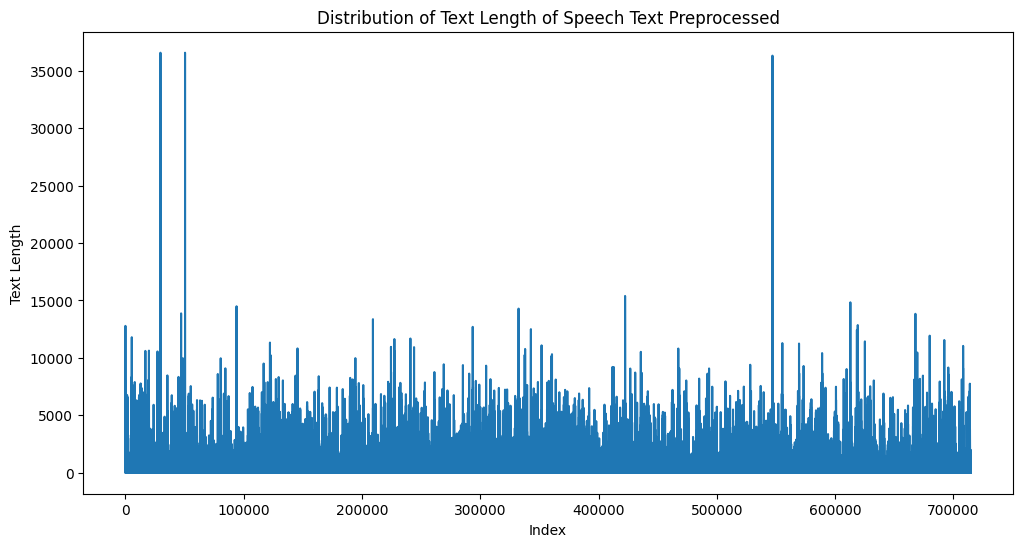

In [156]:
# Distribution of text length of speech_text_preprocessed column as lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data['speech_text_preprocessed'].str.len())
plt.xlabel('Index')
plt.ylabel('Text Length')
plt.title('Distribution of Text Length of Speech Text Preprocessed')
plt.show()
